# PROJEKT VI: Customer Sentiment  Analysis


            key features: EDA, Data Visualization, NPL, WordClowd

#### Objectives:
   * EDA
   * NLP
   * WordCloud
   
#### Phases:
   * Data Preparation
   * Data Analysis and Vizualization
   * NLP
   * Graphics & Results

In [2]:
#lib imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go

#SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#NLTK & WordCloud
import nltk
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

%matplotlib inline

In [4]:
#load dataset
#cd Amazon Consumer Reviews
df = pd.read_csv("data/1429_1.csv")

C:\Users\lucas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Now lets look on our data.

In [5]:
#in case of use pandas profiling
profiling = pandas_profiling.ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
df.isnull().describe()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
count,34660,34660,34660,34660,34660,34660,34660,34660,34660,34660,...,34660,34660,34660,34660,34660,34660,34660,34660,34660,34660
unique,1,2,2,1,1,1,1,2,2,1,...,2,2,2,2,1,2,2,1,1,2
top,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
freq,34660,27900,34658,34660,34660,34660,34660,34621,24039,34660,...,34066,34659,34131,34627,34660,34659,34655,34660,34660,34658


<AxesSubplot:>

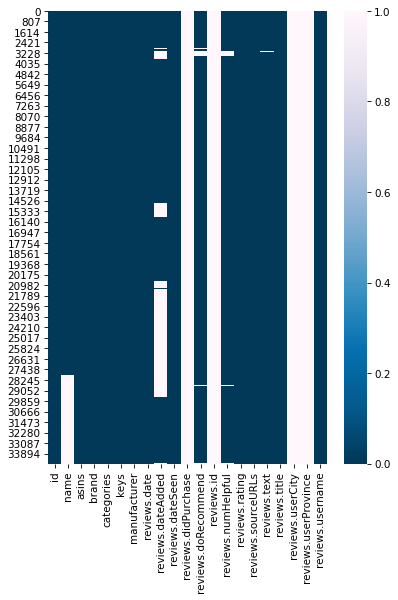

In [7]:
#NaN values visualization
plt.subplots(figsize=(6, 8), dpi=75)
sns.heatmap(data = df.isnull(), cmap="PuBu_r")

Huge amount of NaN values, lets work on it. 
* Remove the null columns.
* Replace NaN names and dateAdded
* drop recommended, helpful and text columnd NaN's

In [8]:
#drop NaN rows
df = df.dropna(subset=['reviews.doRecommend', 'reviews.numHelpful', 'reviews.text'])

In [9]:
#fill NaN
df['name'] = df['name'].fillna('No Name')
df['reviews.dateAdded'] = df['reviews.dateAdded'].fillna('No Date')

In [10]:
#drop NaN columns
df = df.drop(['reviews.didPurchase', 'reviews.id', 'reviews.userCity', 'reviews.userProvince'], axis = 1)

<AxesSubplot:>

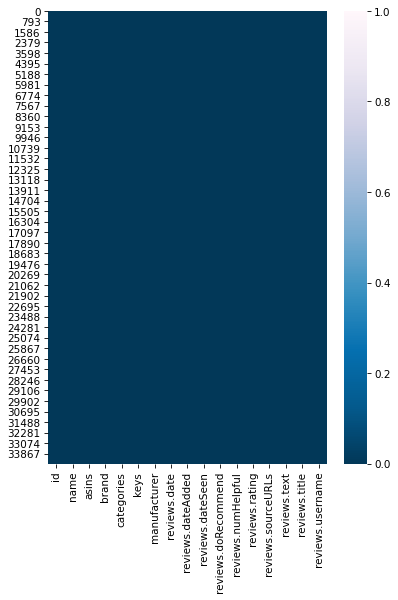

In [11]:
#NaN values visualization
plt.subplots(figsize=(6, 8), dpi=75)
sns.heatmap(data = df.isnull(), cmap="PuBu_r")

In [12]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


Lets drop some unnecessary columns

In [13]:
df = df.drop(['id', 'keys', 'reviews.username', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.sourceURLs', 'manufacturer'], axis = 1)

At last, transform to datetime and change column names

In [14]:
#rename columns
df.rename(columns = {'reviews.doRecommend': 'reviews.recommend','reviews.numHelpful':'reviews.helpful'}, inplace = True)

In [15]:
#datetime
#split date and day hours
df['reviews.date'] = df['reviews.date'].str.split("T", n = 1, expand = True)[0]
#transform to datetime
df['reviews.date'] =  pd.to_datetime(df['reviews.date'], format='%Y-%m-%d')

In [16]:
#result
df[:1]

,name,asins,brand,categories,reviews.date,reviews.recommend,reviews.helpful,reviews.rating,reviews.text,reviews.title
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle


### Data Analysis and Visualization

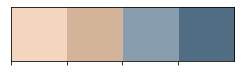

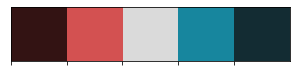

In [17]:
#base color for graphs
colors_cfc = ['#F3D5C0', '#D4B499', '#889EAF', '#506D84']
colors_div = ['#331313', '#D35151', '#DADADA', '#17869E', "#132C33"]

sns.palplot(colors_cfc)
sns.palplot(colors_div)

In [18]:
df['categories'].nunique()

23

Too many categories, lets see the top 10

In [19]:
#top 10 categories
temp = df['categories'].value_counts().to_frame().reset_index().rename(columns = {'index':'categories','categories':'count'}).nlargest(10,columns = 'count')
#names are too big, i'll take the first category of each of them
temp['categories'] = temp['categories'].str.split(',', n = 1, expand = True)[0]
temp

,categories,count
0,Fire Tablets,10966
1,Stereos,6608
2,Back To College,5052
3,Walmart for Business,3176
4,Electronics,2814
5,Tablets,1699
6,Computers/Tablets & Networking,1038
7,Featured Brands,633
8,Walmart for Business,580
9,Electronics Features,372


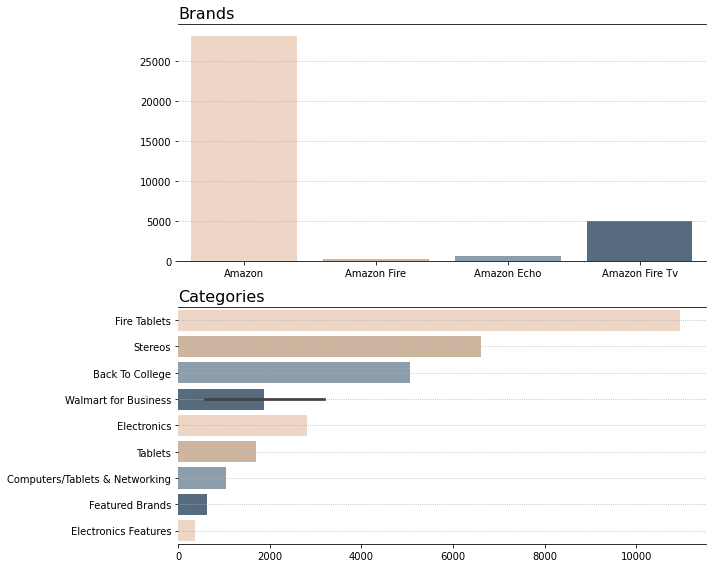

In [20]:
fig , (ax1 , ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(10 , 8))

sns.countplot(data = df, x = 'brand', ax = ax1, palette = colors_cfc).set_title('Brands', fontsize = 16, loc = 'left')
sns.barplot(data = temp, x = 'count', y = 'categories', ax = ax2, palette = colors_cfc).set_title('Categories', fontsize = 16, loc = 'left')

axes = [ax1, ax2]

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

plt.tight_layout()

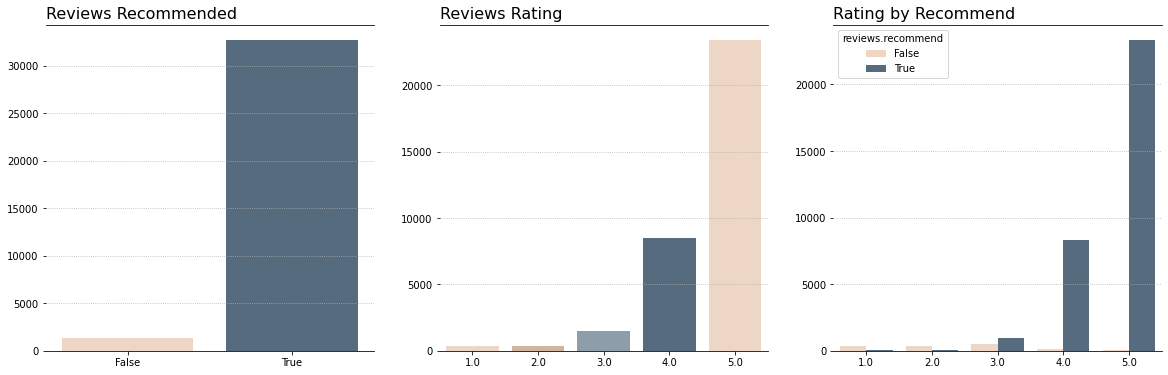

In [21]:
fig , (ax1 , ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20 , 6))

axes = [ax1, ax2, ax3]
colors_cfc = ['#F3D5C0', '#D4B499', '#889EAF', '#506D84']
colors_cfc2 = ['#F3D5C0', '#506D84']

sns.countplot(data = df, x = 'reviews.recommend', palette = colors_cfc2, ax = ax1).set_title('Reviews Recommended', fontsize = 16, loc = 'left')
sns.countplot(data = df, x = 'reviews.rating', palette = colors_cfc, ax = ax2).set_title('Reviews Rating', fontsize = 16, loc = 'left')
sns.countplot(data = df, x = 'reviews.rating', hue = 'reviews.recommend', palette = colors_cfc2, ax = ax3).set_title('Rating by Recommend', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

### NLP

Will make an NLP of the reviews using TextBlob. It's a quite simple package that requires a small number os steps.

* Step 1 Cleaning Data
* Step 2 Get Polarity and Subjectivity values from each review
* Step 3 Use TextBlob Classification Algorithim
* Step 4 Results

Also, for further visualization, i'll also make a word cloud.

Lets make a new df for NLP

In [22]:
df_nlp = df[['asins','reviews.rating','reviews.recommend','reviews.text','reviews.title']]
df[:1]

,name,asins,brand,categories,reviews.date,reviews.recommend,reviews.helpful,reviews.rating,reviews.text,reviews.title
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle


In [23]:
blob = TextBlob(df_nlp['reviews.text'][1])
blob.sentences

[Sentence("great for beginner or experienced person."),
 Sentence("Bought as a gift and she loves it")]

In [24]:
#Get sentiment values
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

#merge values on DataFrame
df_nlp['Polarity'] = df_nlp['reviews.text'].apply(pol)
df_nlp['Subjectivity'] = df_nlp['reviews.text'].apply(sub)

#see head
df_nlp.head()

<ipython-input-24-663e6a8322c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['Polarity'] = df_nlp['reviews.text'].apply(pol)
<ipython-input-24-663e6a8322c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['Subjectivity'] = df_nlp['reviews.text'].apply(sub)


,asins,reviews.rating,reviews.recommend,reviews.text,reviews.title,Polarity,Subjectivity
0,B01AHB9CN2,5.0,True,This product so far has not disappointed. My c...,Kindle,0.325000,0.783333
1,B01AHB9CN2,5.0,True,great for beginner or experienced person. Boug...,very fast,0.800000,0.825000
2,B01AHB9CN2,5.0,True,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,0.600000,0.700000
3,B01AHB9CN2,4.0,True,I've had my Fire HD 8 two weeks now and I love...,Good!!!,0.374583,0.731250
4,B01AHB9CN2,5.0,True,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,0.368056,0.616226


Text(0.5, 1.0, 'Reviews by Recommended')

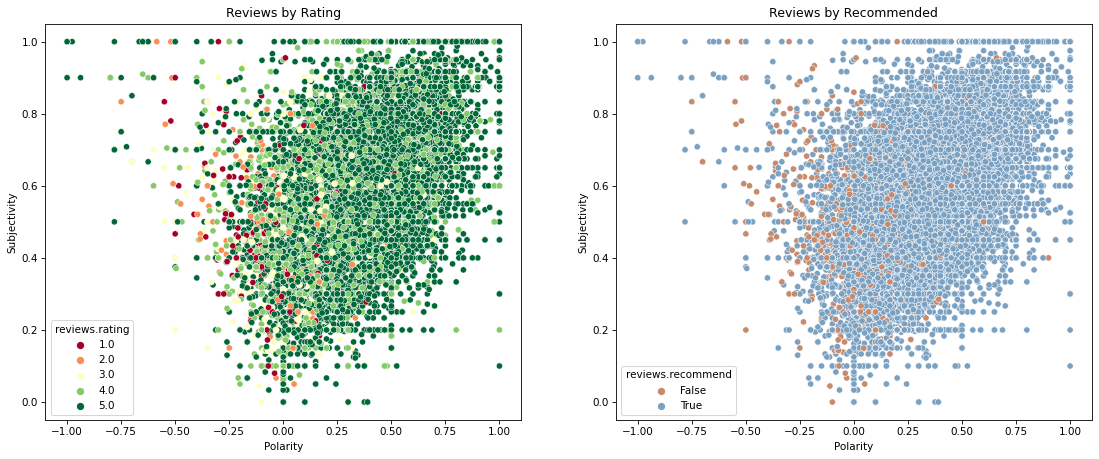

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), dpi=75)

#plot 1
sns.scatterplot(data = df_nlp, x = "Polarity", y = "Subjectivity", hue = 'reviews.rating', ax = ax1, palette = 'RdYlGn')
ax1.set_title('Reviews by Rating')


#plot 2
sns.scatterplot(data = df_nlp, x = "Polarity", y = "Subjectivity", hue = 'reviews.recommend', ax = ax2, palette = 'twilight_shifted_r')
ax2.set_title('Reviews by Recommended')

#### WordCloud

In [26]:
#make a positive words list of recommended products
positive_list = []

for i in df_nlp[df_nlp['reviews.recommend'] == True]['reviews.text']:
    blob = TextBlob(i).words
    for words in blob:
        if TextBlob(words).sentiment[0] > 0.3:
            singular = words.singularize()
            positive_list.append(singular)

In [27]:
#make a negative words list of not recommended producs
negative_list = []

for i in df_nlp[df_nlp['reviews.recommend'] == False]['reviews.text']:
    blob = TextBlob(i).words
    for words in blob:
        if TextBlob(words).sentiment[0] < -0.3:
            singular = words.singularize()
            negative_list.append(singular)

In [28]:
#create WordClouds
positive_wc = WordCloud(width = 1500, height = 1000, background_color="white", collocations = False).generate(str(positive_list)) 
negative_wc = WordCloud(width = 1500, height = 1000, background_color="white", collocations = False).generate(str(negative_list)) 

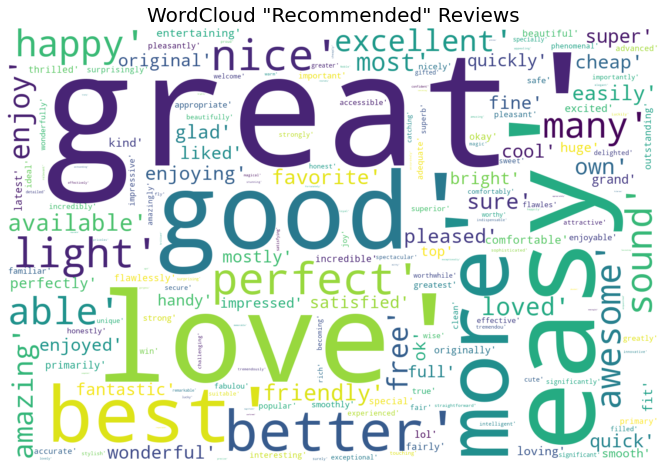

In [29]:
plt.figure(figsize=(12, 8))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('WordCloud "Recommended" Reviews', fontsize=20)
plt.axis("off")
plt.show()

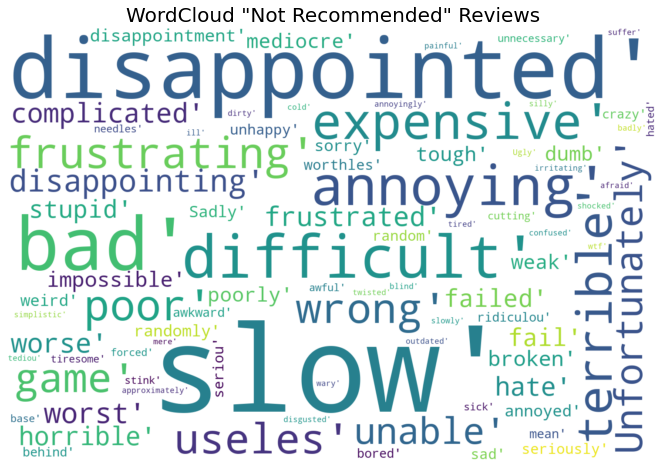

In [30]:
plt.figure(figsize=(12, 8))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('WordCloud "Not Recommended" Reviews', fontsize=20)
plt.axis("off")
plt.show()